In [1]:
from qTools import *

import numpy as np
from datetime import datetime
import os
import qutip

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

## Drive coupling extension 
### (To be put together later)

## System Parameters

In [2]:
omega_q     = 10
omega_drive = 10 + 1
omega_Rabi  = 10

detuning = omega_q - omega_drive

## Creating Qubit and Drive

In [3]:
qubit = Qubit(frequency=omega_q)

#drive terms
drive_term1 = qubit.addTerm(sigmam, omega_Rabi)
drive_term2 = qubit.addTerm(sigmap, omega_Rabi)

In [4]:
qubit.initialState = {0:0.5, 1:0.5}
# qubit.initialState = qubit.initialState * (np.exp(-1j*0.3))

In [5]:
print(qubit.initialState.A)

[[0.70710678]
 [0.70710678]]


## (For time dependency)

In [6]:
drive_coeff = lambda t: np.exp(-1j * detuning * t)
drive_coeffc = lambda t: np.exp(1j * detuning * t)

qubit.subSys['Qubit1term2'].timeDependency = drive_coeffc
qubit.subSys['Qubit1term3'].timeDependency = drive_coeff

"""tSweep = qubit.simulation.timeDependency.createSweep(system=qubit)

def coeff_sweep(sweep):
    qubit = sweep.system
    time = qubit.simulation.stepSize * sweep.index
    
    qubit.subSys['Qubit1term2'].frequency = np.conj(drive_coeff(time))
    qubit.subSys['Qubit1term3'].frequency = drive_coeff(time)

tSweep.sweepFunction = coeff_sweep"""

"tSweep = qubit.simulation.timeDependency.createSweep(system=qubit)\n\ndef coeff_sweep(sweep):\n    qubit = sweep.system\n    time = qubit.simulation.stepSize * sweep.index\n    \n    qubit.subSys['Qubit1term2'].frequency = np.conj(drive_coeff(time))\n    qubit.subSys['Qubit1term3'].frequency = drive_coeff(time)\n\ntSweep.sweepFunction = coeff_sweep"

## Define Simulation Output

In [7]:
def expect(sim, state):
    # Fidelity to intial
    sim.qRes.results['fidelity'].append(fidelityKet(state, qubit.initialState))

    # Bloch Sphere coordinates
    sim.qRes.results['x'].append(expectationKet(sigmax(), state))
    sim.qRes.results['y'].append(expectationKet(sigmay(), state))
    sim.qRes.results['z'].append(expectationKet(sigmaz(), state))

qubit.simulation.compute = expect

## Simulation Parameters and Sweeps

In [8]:
qubit.simulation.totalTime = 0.25
qubit.simulation.stepSize = 0.001
qubit.simulation.delStates = True
print(qubit.simulation.stepCount)

250


In [9]:
#detuning_sweep = qubit.simulation.Sweep.createSweep(system=qubit, sweepKey='frequency', sweepList=np.linspace(0, 20, 5))

## Run Simulation

In [10]:
qubit.simulation.run()

In [11]:
freeEvolution.numberOfExponentiations

250

## Plotting

In [ ]:
# plt.pcolormesh(np.arange(0, qSim.totalTime + qSim.stepSize, qSim.stepSize), wSweep.sweepList, qSim.qRes.results['fidelity'])
# plt.xlabel('Time (μs)')
# plt.ylabel('Frequency (MHz)')
# plt.show()

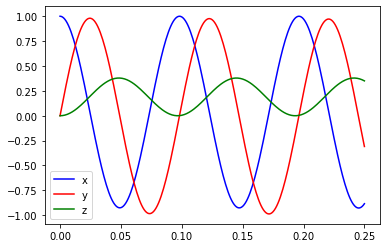

In [12]:
x = qubit.simulation.qRes.results['x']
y = qubit.simulation.qRes.results['y']
z = qubit.simulation.qRes.results['z']

t = qubit.simulation.timeList
plt.plot(t, x, c='b')
plt.plot(t, y, c='r')
plt.plot(t, z, c='g')
plt.legend(['x', 'y', 'z'])
plt.show()

In [ ]:
x = qubit.simulation.qRes.results['x']
y = qubit.simulation.qRes.results['y']
z = qubit.simulation.qRes.results['z']

plt.plot(x, y)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()

In [ ]:
#If no normal sweeps have been done

x = qubit.simulation.qRes.results['x']
y = qubit.simulation.qRes.results['y']
z = qubit.simulation.qRes.results['z']

b = qutip.Bloch3d()
b.add_points([x, y, z])
b.show()

In [ ]:
#If a normal sweep has been done

x = qubit.simulation.qRes.results['x']
y = qubit.simulation.qRes.results['y']
z = qubit.simulation.qRes.results['z']

for xi, yi, zi in zip(x, y, z):
    b = qutip.Bloch()
    b.add_points([xi, yi, zi])
    b.show()